In [39]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
from typing import List

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_context("talk")
sns.set_style("whitegrid")

pd.options.display.max_columns = None
pd.set_option("display.max_columns", 100)

import sys

sys.path.append("..")
from sgs_utils.path_conf import loc_data_dir
from sgs_utils.data_filtering import (
    _silent_recording_mask,
    _noisy_recording_mask,
    _silent_end_mask,
    _skip_id_mask,
    get_valid_audio_mask,
)
from scipy.stats import mannwhitneyu, kstest, wilcoxon


# Speech feature visualization - **fixed duration** - `start`

In [40]:
# ------ Configure these parameters ------
DUR_S = 15
start = False

# load the required data
feat_path = loc_data_dir.joinpath(
    f"df_gemaps_{DUR_S}s_{'start' if start else 'end'}.parquet"
)
display(feat_path)
df_feat_tot = pd.read_parquet(feat_path, engine="fastparquet")
df_session = pd.read_parquet(
    loc_data_dir.joinpath("df_session_tot_cleaned_VAD.parquet")
)
print("df_feat_tot", df_feat_tot.shape)
print("df_session", df_session.shape)

# and merge the data
df_session_feat = df_feat_tot.merge(
    df_session, on=["ID", "DB", "pic_name", "time_str"], how="left"
)

del feat_path, df_session, df_feat_tot

print("silent recordings")
display(
    df_session_feat[_silent_recording_mask(df_session_feat)][
        ["ID", "pic_name", "time_str"]
    ]
)
print("skip ids")
display(df_session_feat[_skip_id_mask(df_session_feat)][["ID", "pic_name", "time_str"]])
print("noisy_recordings")
display(
    df_session_feat[_noisy_recording_mask(df_session_feat)][
        ["ID", "pic_name", "time_str"]
    ]
)

# mask for valid audio
df_session_feat = (
    df_session_feat[
        get_valid_audio_mask(df_session_feat) & ~_silent_end_mask(df_session_feat)
    ]
    .copy()
    .reset_index(drop=True)
)
print("df_session_feat masked", df_session_feat.shape)

# TODO
# df_session_feat = df_session_feat[
#     df_session_feat.ID != "20adc51f-8ef5-41a2-9297-8dc263b40221"
# ]
# df_session_feat = df_session_feat[
#     df_session_feat.ID != "aeacc3a4-754e-4cd3-9ce7-62a41147d637"
# ]

# add a speech_style column to df_session_feat
df_session_feat["speech_style"] = df_session_feat.DB.map(
    lambda x: {"marloes": "Read", "PiSCES": "SGS", "Radboud": "SGS"}.get(x)
)
df_session_feat.head(3)


PosixPath('/home/jonas/git/github/semi-guided-speech/loc_data/df_gemaps_15s_end.parquet')

df_feat_tot (2909, 69)
df_session (3257, 26)
silent recordings


,ID,pic_name,time_str


skip ids


,ID,pic_name,time_str


noisy_recordings


,ID,pic_name,time_str
11,099ceb4d-28f3-4b1f-8f8e-16b439a882f1,Rafd090_04_Caucasian_female_neutral_frontal,17:06:37
2486,d7fbc4b9-5f94-4639-b82b-6b1592b2ad3a,Rafd090_02_Caucasian_female_neutral_frontal,19:52:41
2487,d7fbc4b9-5f94-4639-b82b-6b1592b2ad3a,Rafd090_61_Caucasian_female_neutral_frontal,19:54:55
2488,d7fbc4b9-5f94-4639-b82b-6b1592b2ad3a,Rafd090_58_Caucasian_female_neutral_frontal,19:56:41
2489,d7fbc4b9-5f94-4639-b82b-6b1592b2ad3a,Picture 80,19:57:47
2555,e03516f6-1af7-4c72-ad49-41b6db4733d7,Rafd090_04_Caucasian_female_neutral_frontal,22:07:40


df_session_feat masked (2901, 91)


,file,start,end,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,loudness_sma3_amean,loudness_sma3_stddevNorm,loudness_sma3_percentile20.0,loudness_sma3_percentile50.0,loudness_sma3_percentile80.0,loudness_sma3_pctlrange0-2,loudness_sma3_meanRisingSlope,loudness_sma3_stddevRisingSlope,loudness_sma3_meanFallingSlope,loudness_sma3_stddevFallingSlope,jitterLocal_sma3nz_amean,jitterLocal_sma3nz_stddevNorm,shimmerLocaldB_sma3nz_amean,shimmerLocaldB_sma3nz_stddevNorm,HNRdBACF_sma3nz_amean,HNRdBACF_sma3nz_stddevNorm,logRelF0-H1-H2_sma3nz_amean,logRelF0-H1-H2_sma3nz_stddevNorm,logRelF0-H1-A3_sma3nz_amean,logRelF0-H1-A3_sma3nz_stddevNorm,F1frequency_sma3nz_amean,F1frequency_sma3nz_stddevNorm,F1bandwidth_sma3nz_amean,F1bandwidth_sma3nz_stddevNorm,F1amplitudeLogRelF0_sma3nz_amean,F1amplitudeLogRelF0_sma3nz_stddevNorm,F2frequency_sma3nz_amean,F2frequency_sma3nz_stddevNorm,F2amplitudeLogRelF0_sma3nz_amean,F2amplitudeLogRelF0_sma3nz_stddevNorm,F3frequency_sma3nz_amean,F3frequency_sma3nz_stddevNorm,F3amplitudeLogRelF0_sma3nz_amean,F3amplitudeLogRelF0_sma3nz_stddevNorm,alphaRatioV_sma3nz_amean,alphaRatioV_sma3nz_stddevNorm,hammarbergIndexV_sma3nz_amean,hammarbergIndexV_sma3nz_stddevNorm,slopeV0-500_sma3nz_amean,slopeV0-500_sma3nz_stddevNorm,slopeV500-1500_sma3nz_amean,slopeV500-1500_sma3nz_stddevNorm,alphaRatioUV_sma3nz_amean,hammarbergIndexUV_sma3nz_amean,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,pic_name,time_str,DB,ID,age,education,sex,timestamp,Marloes,PiSCES,Radboud,device,prolific_token,wav_size,wav_sample_rate,wav_duration_s,wav_timestamp,arousal,valence,DB_no,session_no,pic_no,pic_count,VAD_sliced_duration_s,VAD_speech_start_s,VAD_speech_end_s,speech_style
0,/media/SPS/interim/speech_webapp/VAD_slice_16k...,0 days 00:00:07.619937,0 days 00:00:22.619937,33.850227,0.105944,33.023087,33.945721,36.165443,3.142357,156.227295,148.856659,59.767223,89.799194,0.411634,0.823039,0.138254,0.318644,0.635913,0.497660,7.496657,6.424032,5.612262,4.044155,0.024030,1.982259,1.090266,1.027343,9.756880,0.294931,10.838393,0.790265,33.285439,0.239357,636.770691,0.314765,1420.298706,0.172030,-127.095901,-0.686157,1734.699097,0.123768,-129.229721,-0.621258,2855.787109,0.089345,-133.240875,-0.567925,-23.481592,-0.281323,33.622211,0.250111,-0.009590,-3.039073,-0.024226,-0.631559,-19.825270,31.512363,-0.050495,0.002650,1.867912,2.677376,0.147250,0.113358,0.211282,0.214598,marloes,16:53:49,marloes,099ceb4d-28f3-4b1f-8f8e-16b439a882f1,21,so,female,2022-06-27 16:42:13.679102+02:00,7,15,15,earphones,60f833d2fc774b09e3e09758,2342956,48000,24.41,2022-06-27 16:53:50+02:00,25,70,1,1,NaN,NaN,22.619937,1.28,23.399938,Read
1,/media/SPS/interim/speech_webapp/VAD_slice_16k...,0 days 00:00:27.119875,0 days 00:00:42.119875,34.144611,0.121281,33.325859,34.103828,36.804985,3.479126,154.825546,133.919296,-4.529495,92.517975,0.426551,1.137881,0.139899,0.241362,0.648041,0.508142,24.400536,27.512356,10.089767,9.972820,0.018276,1.395683,0.802046,1.237693,9.974118,0.332859,9.906165,0.784347,38.745522,0.186030,621.794128,0.321318,1486.751831,0.163302,-154.427505,-0.506338,1683.470947,0.136229,-153.855423,-0.478497,2857.498779,0.077024,-157.560394,-0.429141,-25.020851,-0.266679,39.639919,0.160098,-0.012114,-2.364683,-0.025647,-0.646350,-24.964502,36.967163,-0.064576,-0.000620,1.400934,1.606426,0.162917,0.153310,0.438750,0.574509,Picture 132,16:54:45,PiSCES,099ceb4d-28f3-4b1f-8f8e-16b439a882f1,21,so,female,2022-06-27 16:42:13.679102+02:00,7,15,15,earphones,

# Visualizations

In [47]:
# non speech feature variables
id_vars = [
    "wav_duration_s",
    "file",
    "start",
    "end",
    "DB",
    "speech_style",
    "DB_no",
    "education",
    "timestamp",
    "time_str",
    "sex",
    "age",
    "Marloes",
    "PiSCES",
    "Radboud",
    "session_no",
    "ID",
    "wav_size",
    "device",
    "pic_name",
    "arousal",
    "valence",
    "pic_no",
    "prolific_token",
    "pic_count",
    "wav_timestamp",
    "wav_sample_rate",
    "VAD_speech_end_s",
    "VAD_speech_start_s",
    "VAD_sliced_duration_s",
]


In [48]:
def catplot_wrapped(feat_cols: List[str], **kwargs):
    default_kwargs = dict(
        col_wrap=3,
        height=6,
        kind="box",
        palette="Set3",
        sharey=False,
        sharex="row",
        showfliers=False,
    )
    default_kwargs.update(kwargs)
    g = sns.catplot(
        data=pd.melt(
            frame=df_session_feat,
            id_vars=id_vars,
            value_vars=feat_cols,
            value_name="value",
            var_name="variable",
        ),
        y="value",
        col="variable",
        **default_kwargs,
    )
    # remove the bottom spline and xlabels
    for ax in g.axes.flat:
        ax.spines.bottom.set_visible(False)
        ax.set_xlabel("")

    g.set_titles("{col_name}")
    plt.subplots_adjust(wspace=0.6, hspace=0.3)
    return g

def delta_catplot_wrapped(df_delta: pd.DataFrame, feat_cols : List[str], **kwargs):
    default_kwargs = dict(
        col_wrap=3,
        height=6,
        kind="violin",
        bw=.3,
        palette="Set3",
        x='value',
        y='delta',
        sharex=False,
        inner='quartile',
        showfliers=False,
    )
    default_kwargs.update(kwargs)
    if default_kwargs['kind'] == 'box':
        default_kwargs.pop('bw')
        default_kwargs.pop('inner')
    g = sns.catplot(
        data=df_delta.melt(
            id_vars=["delta"], value_vars=feat_cols, var_name="v"
        ),
        col="v",
        **default_kwargs
    )
    g.set_titles("{col_name}")

    # remove the bottom spline and x-labels
    for ax in g.axes.flat:
        ax.spines.bottom.set_visible(False)
        ax.spines.left.set_visible(False)
        ax.set_xlabel("")
        ax.axvline(x=0, color="black", linestyle=":", linewidth=3)

    plt.subplots_adjust(wspace=0.15, hspace=0.3)
    return g


## Statistics

We first test for normality using the kolmogorov smirnov test

In [49]:
c, option, pval, feature = [None] * 4
for c in ["speech_style", "DB"]:
    for option in df_session_feat[c].unique():
        for feature in set(df_session_feat.columns).difference(list(id_vars)):
            pval = kstest(
                df_session_feat[df_session_feat[c] == option][feature].dropna(),
                "norm",
                alternative="two_sided",
            ).pvalue
            # We print something if the pvalue is smaller than 1e-6
            if pval > 0.000001:
                print(
                    f"{c:<20s}\t{option:<20s}\t{feature:<20s}\t{pval}{round(pval, 4)}"
                )
    print("---" * 20)

del c, pval, option, feature


------------------------------------------------------------
------------------------------------------------------------


The null hypothesis was rejected each time; **All features have a non normal distriubtion**.<br>
As such, we need to use *non-parametric tests* in all future statistics

### `speech_style`: *read* vs *SGS* speech

In [50]:
# First we calculate the statistics on both the read (=marloes) and the
# SGS (= PiSCES + Radboud)
feat_score_list, test = [], None
for feature in set(df_session_feat.columns).difference(list(id_vars)):
    test = mannwhitneyu(
        df_session_feat[(df_session_feat.speech_style == "Read")][feature],
        df_session_feat[(df_session_feat.speech_style == "SGS")][feature],
        alternative="two-sided",
        nan_policy="omit",
    )
    feat_score_list.append([feature, test.pvalue])

df_ss = pd.DataFrame(feat_score_list, columns=["feature", "p_value"]).sort_values(
    by="p_value"
)
df_ss_rel = df_ss[df_ss.p_value < 0.001]
df_ss_rel_05 = df_ss[df_ss.p_value < 0.05]

del feat_score_list, test, df_ss, feature


In [51]:
df_ss_rel.head(10)

,feature,p_value
52,VoicedSegmentsPerSec,4.186909e-103
40,StddevUnvoicedSegmentLength,3.529744e-84
57,MeanUnvoicedSegmentLength,8.484887e-80
2,loudnessPeaksPerSec,2.597217e-76
53,shimmerLocaldB_sma3nz_amean,3.847283e-44
28,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,2.073812e-38
12,shimmerLocaldB_sma3nz_stddevNorm,1.367506e-25
13,F3amplitudeLogRelF0_sma3nz_amean,3.722147e-25
29,F2amplitudeLogRelF0_sma3nz_amean,5.599402e-23
35,F3amplitudeLogRelF0_sma3nz_stddevNorm,2.642487e-22


### `Database`: *pisces* vs *radboud*

In [52]:
feat_score_list = []
for feature in set(df_session_feat.columns).difference(list(id_vars)):
    # print(feature)
    test = mannwhitneyu(
        df_session_feat[(df_session_feat.DB == "PiSCES")][feature],
        df_session_feat[(df_session_feat.DB == "Radboud")][feature],
        alternative="two-sided",
        nan_policy="omit",
    )
    feat_score_list.append([feature, test.pvalue])

df_db = pd.DataFrame(feat_score_list, columns=["feature", "p_value"]).sort_values(
    by="p_value"
)
df_db_rel = df_db[df_db.p_value < 0.001]
df_db_rel_05 = df_db[df_db.p_value < 0.05]

del feat_score_list, test, df_db, feature


# `GeMAPS` ([link](https://sail.usc.edu/publications/files/eyben-preprinttaffc-2015.pdf))

## Inter user comparison (each recording = 1 datapoint)

### `varia`: Feature value analysis

<AxesSubplot:ylabel='Frequency'>

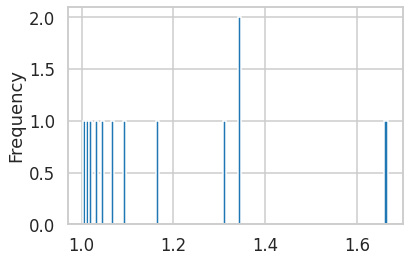

In [11]:
# df_session_feat[df_session_feat['MeanUnvoicedSegmentLength']].
# df_session_feat['MeanUnvoicedSegmentLength'].plot.hist(bins=100)
df_session_feat[df_session_feat["MeanUnvoicedSegmentLength"] > 1][
    "MeanUnvoicedSegmentLength"
].plot.hist(bins=100)


<AxesSubplot:ylabel='Frequency'>

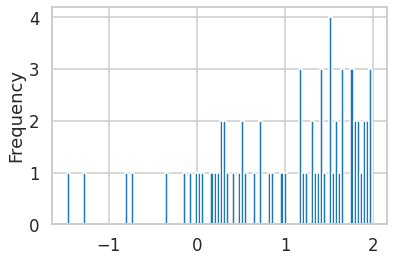

In [12]:
# df_session_feat[df_session_feat['MeanUnvoicedSegmentLength']].
# df_session_feat['MeanUnvoicedSegmentLength'].plot.hist(bins=100)
df_session_feat[df_session_feat["HNRdBACF_sma3nz_amean"] < 2][
    "HNRdBACF_sma3nz_amean"
].plot.hist(bins=100)


<AxesSubplot:ylabel='Frequency'>

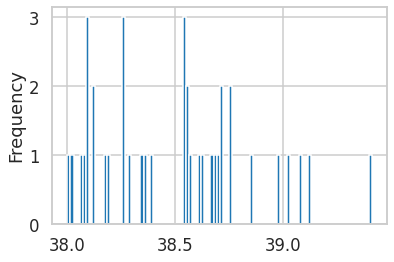

In [13]:
# df_session_feat[df_session_feat['MeanUnvoicedSegmentLength']].
# df_session_feat['MeanUnvoicedSegmentLength'].plot.hist(bins=100)
df_session_feat[df_session_feat["F0semitoneFrom27.5Hz_sma3nz_amean"] > 38][
    "F0semitoneFrom27.5Hz_sma3nz_amean"
].plot.hist(bins=100)


In [14]:
# df_session_feat[df_session_feat['MeanUnvoicedSegmentLength']].
# df_session_feat['MeanUnvoicedSegmentLength'].plot.hist(bins=100)
df_session_feat[
    df_session_feat["F0semitoneFrom27.5Hz_sma3nz_amean"] > 39.9
]  # .groupby('ID').size()


,file,start,end,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,loudness_sma3_amean,loudness_sma3_stddevNorm,loudness_sma3_percentile20.0,loudness_sma3_percentile50.0,loudness_sma3_percentile80.0,loudness_sma3_pctlrange0-2,loudness_sma3_meanRisingSlope,loudness_sma3_stddevRisingSlope,loudness_sma3_meanFallingSlope,loudness_sma3_stddevFallingSlope,jitterLocal_sma3nz_amean,jitterLocal_sma3nz_stddevNorm,shimmerLocaldB_sma3nz_amean,shimmerLocaldB_sma3nz_stddevNorm,HNRdBACF_sma3nz_amean,HNRdBACF_sma3nz_stddevNorm,logRelF0-H1-H2_sma3nz_amean,logRelF0-H1-H2_sma3nz_stddevNorm,logRelF0-H1-A3_sma3nz_amean,logRelF0-H1-A3_sma3nz_stddevNorm,F1frequency_sma3nz_amean,F1frequency_sma3nz_stddevNorm,F1bandwidth_sma3nz_amean,F1bandwidth_sma3nz_stddevNorm,F1amplitudeLogRelF0_sma3nz_amean,F1amplitudeLogRelF0_sma3nz_stddevNorm,F2frequency_sma3nz_amean,F2frequency_sma3nz_stddevNorm,F2amplitudeLogRelF0_sma3nz_amean,F2amplitudeLogRelF0_sma3nz_stddevNorm,F3frequency_sma3nz_amean,F3frequency_sma3nz_stddevNorm,F3amplitudeLogRelF0_sma3nz_amean,F3amplitudeLogRelF0_sma3nz_stddevNorm,alphaRatioV_sma3nz_amean,alphaRatioV_sma3nz_stddevNorm,hammarbergIndexV_sma3nz_amean,hammarbergIndexV_sma3nz_stddevNorm,slopeV0-500_sma3nz_amean,slopeV0-500_sma3nz_stddevNorm,slopeV500-1500_sma3nz_amean,slopeV500-1500_sma3nz_stddevNorm,alphaRatioUV_sma3nz_amean,hammarbergIndexUV_sma3nz_amean,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,pic_name,time_str,DB,ID,age,education,sex,timestamp,Marloes,PiSCES,Radboud,device,prolific_token,wav_size,wav_sample_rate,wav_duration_s,wav_timestamp,arousal,valence,DB_no,session_no,pic_no,pic_count,VAD_sliced_duration_s,VAD_speech_start_s,VAD_speech_end_s,speech_style


In [15]:
df_session_feat[df_session_feat["HNRdBACF_sma3nz_amean"] < 2][
    ["ID", "DB", "pic_name", "time_str", "MeanUnvoicedSegmentLength"]
].groupby(["ID"]).size()


ID
0e92d89e-a869-470f-8318-932da5107b24     2
1310da4b-d905-421e-9b4c-ba002d8058e7     1
1d259634-7d1a-461c-9098-5be8e94b105b     9
20adc51f-8ef5-41a2-9297-8dc263b40221    31
5ef38e39-8146-4cf5-b365-43a08eac9905     8
716dc108-5588-49ed-bf3c-04fb87212e2b     1
9e6970fe-2bd5-426c-b270-5ee386cd561b     1
aeacc3a4-754e-4cd3-9ce7-62a41147d637    15
e61cd702-cd5f-4258-b4ef-57665e20803c     1
dtype: int64

In [16]:
df_session_feat[df_session_feat["loudness_sma3_meanFallingSlope"] > 20][
    ["ID", "DB", "pic_name", "time_str", "MeanUnvoicedSegmentLength"]
]  # .groupby(["ID"]).size()


,ID,DB,pic_name,time_str,MeanUnvoicedSegmentLength


In [17]:
df_session_feat[df_session_feat["MeanUnvoicedSegmentLength"] > 1][
    ["ID", "DB", "pic_name", "time_str", "MeanUnvoicedSegmentLength"]
]


,ID,DB,pic_name,time_str,MeanUnvoicedSegmentLength
254,1d259634-7d1a-461c-9098-5be8e94b105b,Radboud,Rafd090_05_Caucasian_male_neutral_frontal,16:43:53,1.034615
267,1d259634-7d1a-461c-9098-5be8e94b105b,Radboud,Rafd090_58_Caucasian_female_neutral_frontal,17:03:36,1.019231
947,63defe6b-db35-4b9c-b53d-90df6612beaa,Radboud,Rafd090_05_Caucasian_male_neutral_frontal,17:48:35,1.666250
1183,7e62dc42-e811-4674-ba8b-302850dd84e5,Radboud,Rafd090_36_Caucasian_male_neutral_frontal,14:42:52,1.015000
1957,aeacc3a4-754e-4cd3-9ce7-62a41147d637,Radboud,Rafd090_57_Caucasian_female_neutral_frontal,14:03:16,1.045833
2073,b55d08fb-30f3-499f-8cf4-f0f44321f1a9,Radboud,Rafd090_04_Caucasian_female_neutral_frontal,16:46:06,1.003333
2406,c6a3fb30-04d8-470a-907b-6b81cfcdce83,Radboud,Rafd090_57_Caucasian_female_neutral_frontal,17:09:55,1.345000
2543,e03516f6-1af7-4c72-ad49-41b6db4733d7,Radboud,Rafd090_01_Caucasian_female_neutral_frontal,22:01:21,1.064545
2570,e03516f6-1af7-4c72-ad49-41b6db4733d7,Radboud,Rafd090_24_Caucasian_male_neutral_frontal,22:34:47,1.348000
2600,e0c00b33-2151-4bcf-98b8-82f7701fccea,Radboud,Rafd090_36_Caucasian_male_neutral_frontal,22:43:41,1.164545


### using `speech_style` statistics (read, semi-guided-speech)

In [54]:
# df_session_feat.columns[
#     df_session_feat.columns.map(
#         lambda x: any(k in x.lower() for k in ["voiced", "persec"])
#     )
# ]


#### Analysis of `temporal` features

6 temporal features are included:
* the rate of loudness peaks, i. e., the number of loudness peaks per second,
* the mean length and the standard deviation of continuously voiced regions (F0 > 0),
* the mean length and the standard deviation of unvoiced regions (F0 = 0; approximating pauses),
* the number of continuous voiced regions per second (pseudo syllable rate).

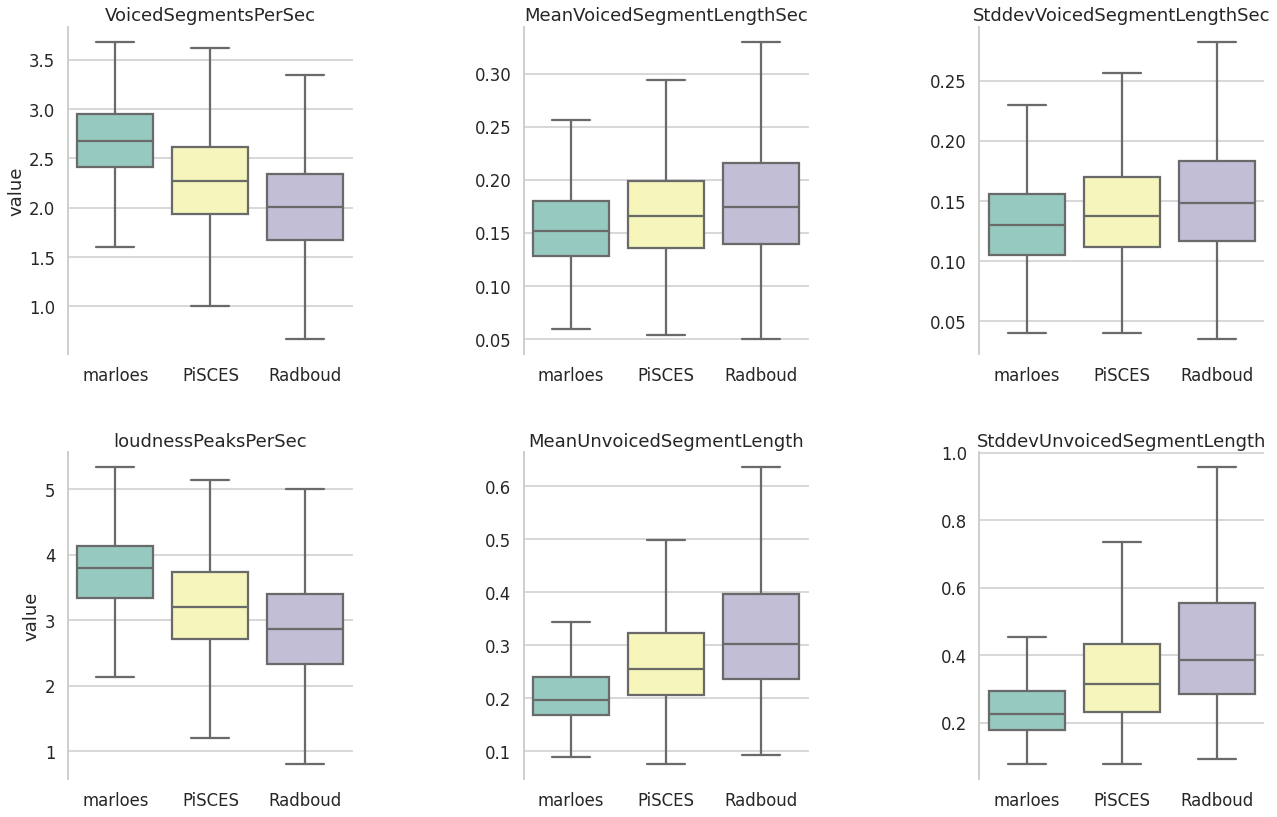

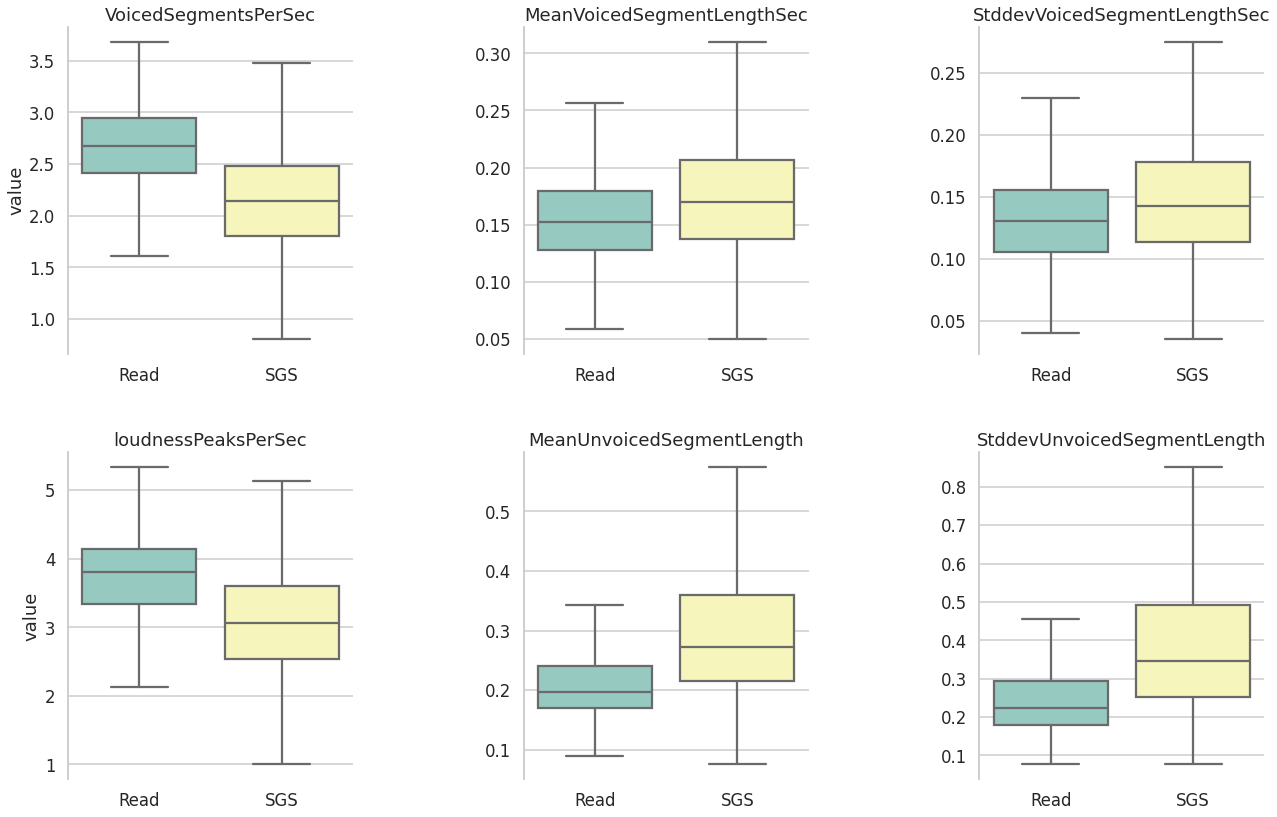

In [55]:
temporal_feat_cols = [
    "VoicedSegmentsPerSec",
    "MeanVoicedSegmentLengthSec",
    "StddevVoicedSegmentLengthSec",
    "loudnessPeaksPerSec",
    "MeanUnvoicedSegmentLength",
    "StddevUnvoicedSegmentLength",
]

g = catplot_wrapped(temporal_feat_cols, x='DB')
g.savefig("../reports/gemapsv10b_temporal_features_DB.pdf", bbox_inches="tight", dpi=250)
g.savefig("../reports/gemapsv10b_temporal_features_DB.png", bbox_inches="tight", dpi=250)

g = catplot_wrapped(temporal_feat_cols, x='speech_style')
g.savefig("../reports/gemapsv10b_temporal_features_style.pdf", bbox_inches="tight", dpi=250)
g.savefig("../reports/gemapsv10b_temporal_features_style.png", bbox_inches="tight", dpi=250)

#### **Frequency** related features

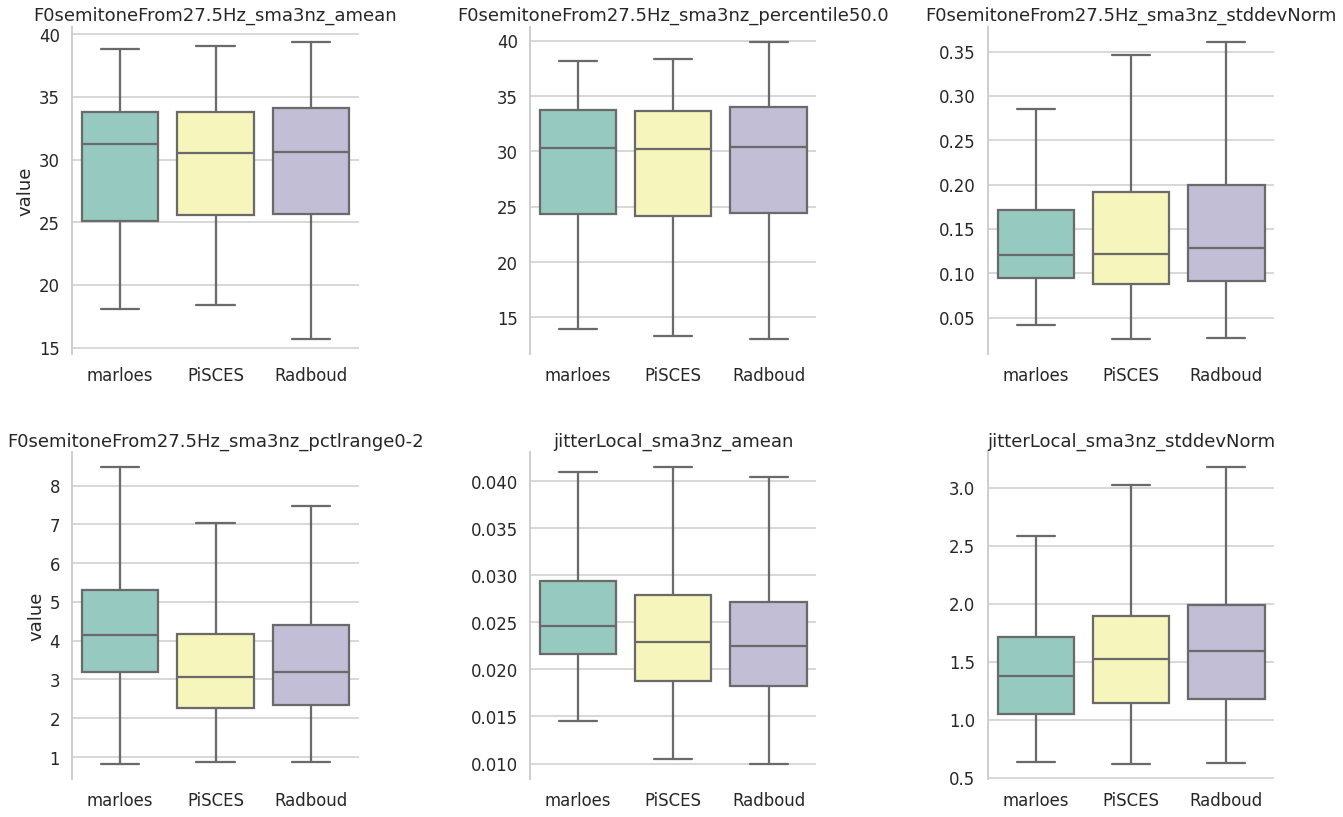

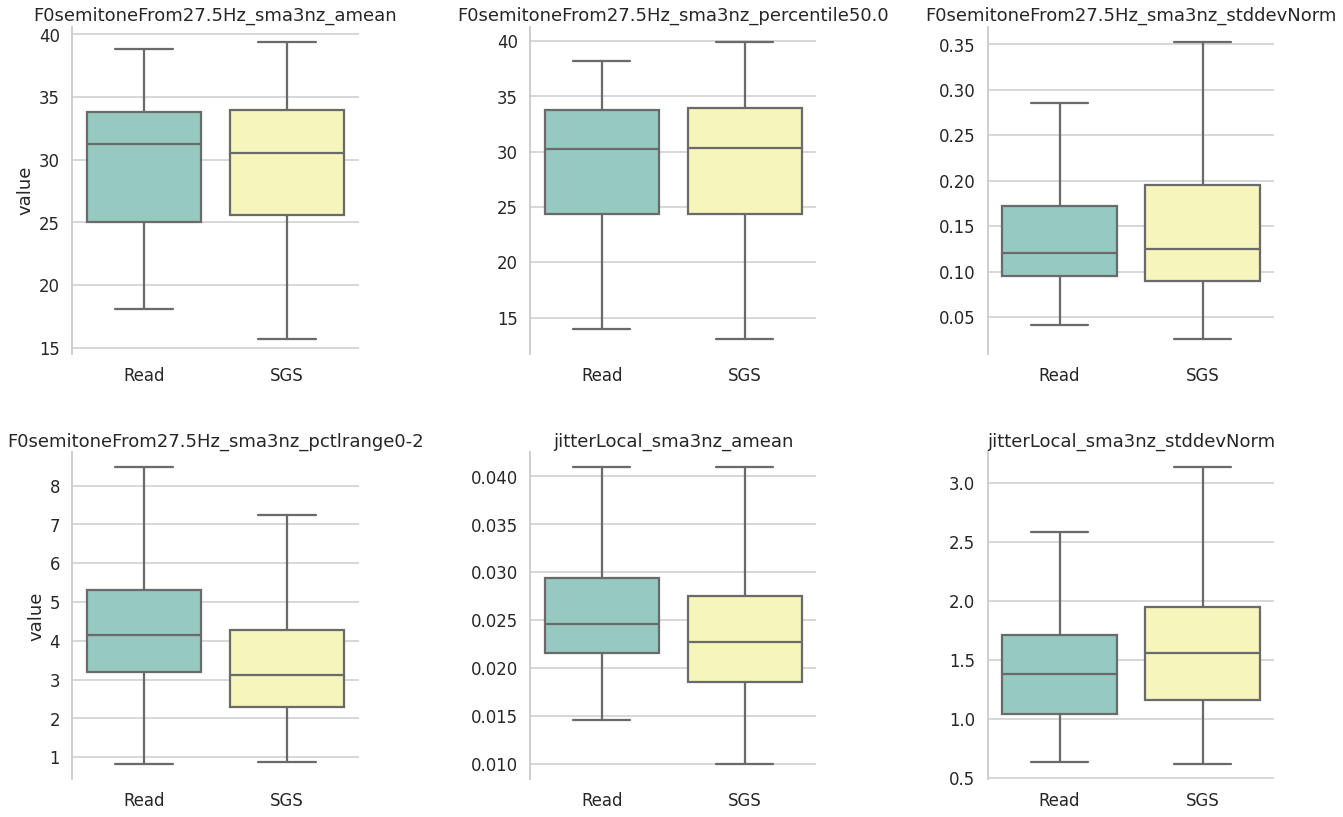

In [20]:
freq_feat_cols = [
    "F0semitoneFrom27.5Hz_sma3nz_amean",
    "F0semitoneFrom27.5Hz_sma3nz_percentile50.0",
    "F0semitoneFrom27.5Hz_sma3nz_stddevNorm",
    "F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2",
    # "F0semitoneFrom27.5Hz_sma3nz_percentile20.0",
    # "F0semitoneFrom27.5Hz_sma3nz_percentile80.0",
    "jitterLocal_sma3nz_amean",
    "jitterLocal_sma3nz_stddevNorm",
]

g = catplot_wrapped(freq_feat_cols, x="DB")
g = catplot_wrapped(freq_feat_cols, x="speech_style")

#### `Amplitude` related features

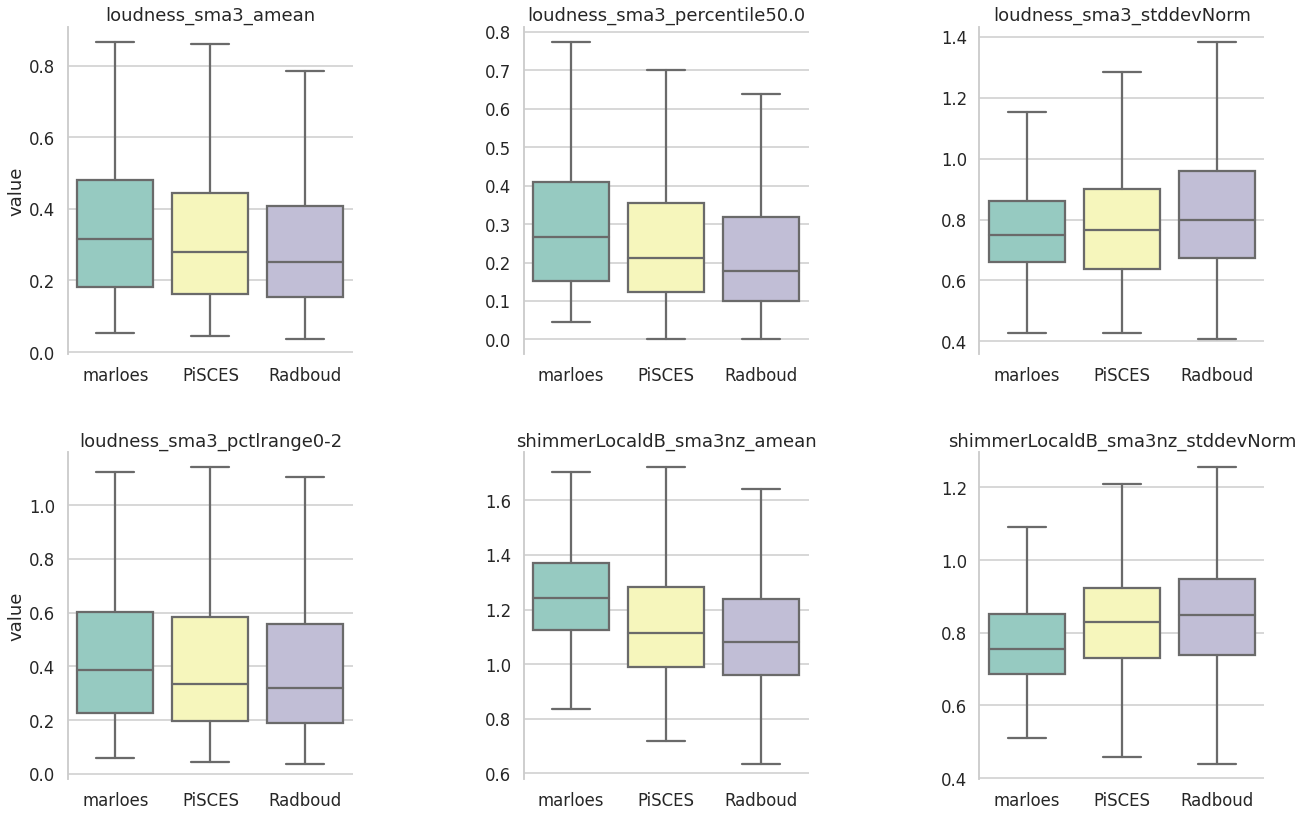

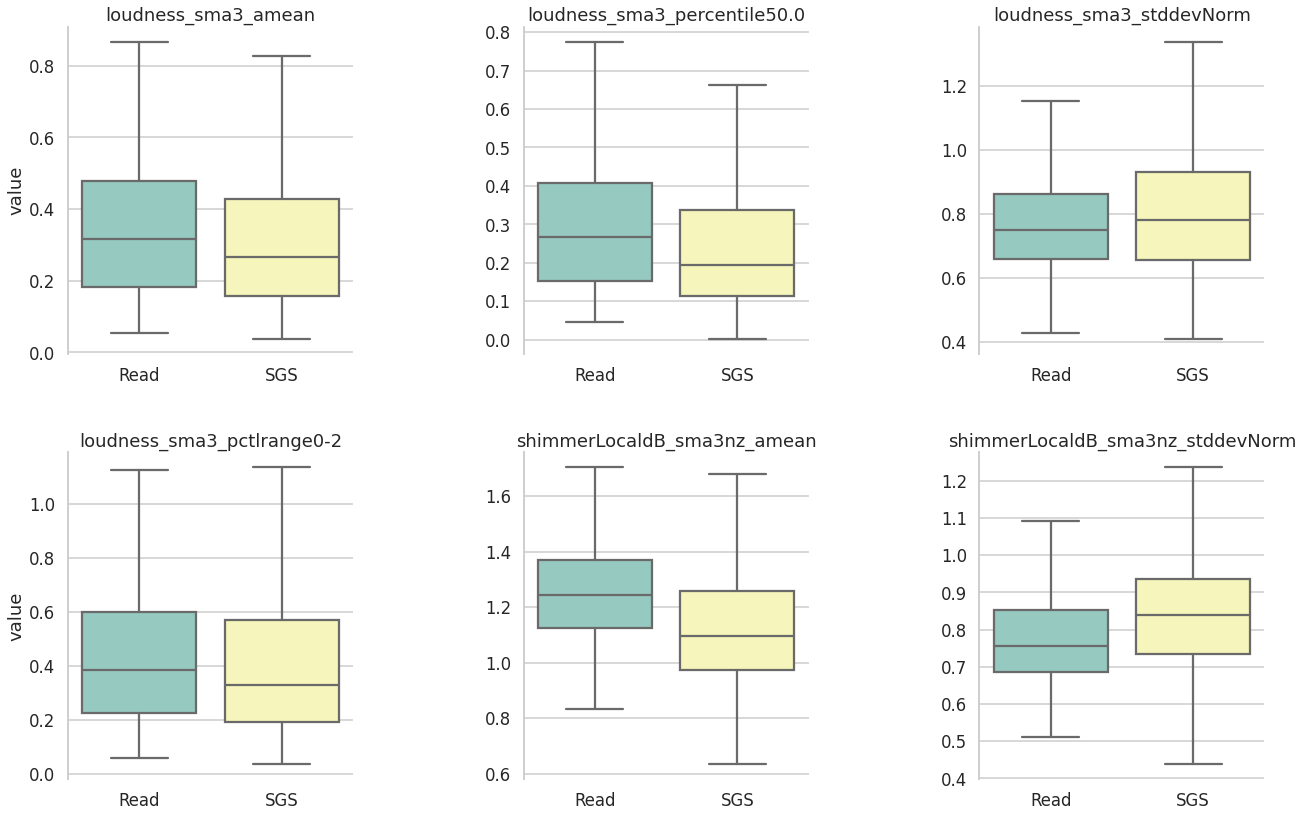

In [56]:
ampl_feat_cols = [
    "loudness_sma3_amean",
    "loudness_sma3_percentile50.0",
    "loudness_sma3_stddevNorm",
    # "loudness_sma3_percentile20.0",
    # "loudness_sma3_percentile80.0",
    "loudness_sma3_pctlrange0-2",
    # "loudness_sma3_meanRisingSlope",
    # "loudness_sma3_stddevRisingSlope",
    # "loudness_sma3_meanFallingSlope",
    # "loudness_sma3_stddevFallingSlope",
    # "loudnessPeaksPerSec",
    "shimmerLocaldB_sma3nz_amean",
    "shimmerLocaldB_sma3nz_stddevNorm",
]

catplot_wrapped(ampl_feat_cols, x="DB")
catplot_wrapped(ampl_feat_cols, x="speech_style")

### Statistically relevant speech beatures for `database`, but not for `speech_style` group

In [57]:
# Features which are only statiscilly different within the `database` group, but not in in the `speech_style` group
set(df_db_rel.feature).difference(df_ss_rel.feature)


set()

## Intra user comparison: (mean) normalization per participant

In [58]:
# calculate the mean per participant, per block
# TODO -> maybe use the reference values? and subtract the control / stress block
# from these reference values
feat_cols: List[str] = temporal_feat_cols + freq_feat_cols + ampl_feat_cols

# --------------- on speech_style level ----------------
mean_func = (
    df_session_feat.groupby(["ID", "speech_style"])[feat_cols]
    # .mean()
    .median()
    .reset_index()
)

mean_sgs_func = mean_func[mean_func.speech_style == "SGS"].set_index("ID")
mean_read_func = mean_func[mean_func.speech_style == "Read"].set_index("ID")

mean_read_sgs_func = mean_read_func[feat_cols] - mean_sgs_func[feat_cols]


# ---------------------- on database level ----------------
mean_func = (
    df_session_feat.groupby(["ID", "DB"])[feat_cols]
    # .mean()
    .median()
    .reset_index()
)

mean_marloes_func = mean_func[mean_func.DB == "marloes"].set_index("ID")
mean_radboud_func = mean_func[mean_func.DB == "Radboud"].set_index("ID")
mean_pisces_func = mean_func[mean_func.DB == "PiSCES"].set_index("ID")

mean_db_func = [
    (mean_marloes_func[feat_cols] - mean_radboud_func[feat_cols]).assign(delta="M-R")
]
mean_db_func.append(
    (mean_marloes_func[feat_cols] - mean_pisces_func[feat_cols]).assign(delta="M-P")
)
mean_db_func.append(
    (mean_radboud_func[feat_cols] - mean_pisces_func[feat_cols]).assign(delta="R-P")
)
mean_db_func = pd.concat(mean_db_func)


### `speech_style`: sgs vs. read

In [59]:
feat_score_list = []
for feat in mean_read_sgs_func.columns:
    test = wilcoxon(
        x=mean_read_sgs_func[feat].values, alternative="two-sided", nan_policy="omit"
    )
    feat_score_list.append([feat, test.pvalue])

df_i = pd.DataFrame(feat_score_list, columns=["feature", "p_value"]).sort_values(
    by="p_value"
)
df_i_rel = df_i[df_i.p_value < 0.001]
df_i_rel_05 = df_i[df_i.p_value < 0.05]


None of the features seem to be statistically irrelevant

In [60]:
set(df_i_rel.feature.values).difference(mean_read_sgs_func.columns)


set()

In [61]:
def catplot_speech_style_wrapped(feat_cols: List[str], **kwargs):
    default_kwargs = dict(
        kind="violin",
        height=4,
        aspect=2,
        bw=0.3,
        inner="quartile",
        col_wrap=3,
        sharex=False,
        palette="Set3",
    )
    default_kwargs.update(kwargs)
    if default_kwargs['kind'] == 'box':
        default_kwargs.pop('bw')
        default_kwargs.pop('inner')

    g = sns.catplot(
        data=mean_read_sgs_func[feat_cols].iloc[:, :].melt(var_name="v"),
        col="v",
        x="value",
        **default_kwargs
    )
    g.fig.suptitle("mean read feature - mean SGS feature", y=1.01)
    g.set_titles("{col_name}")
    for ax in g.fig.axes:
        ax.axvline(x=0, color="darkorange", linestyle=":", linewidth=3)
        ax.spines.bottom.set_visible(False)
        ax.spines.left.set_visible(False)
        ax.set_xlabel("")
    plt.subplots_adjust(wspace=0.15, hspace=0.4)
    return g

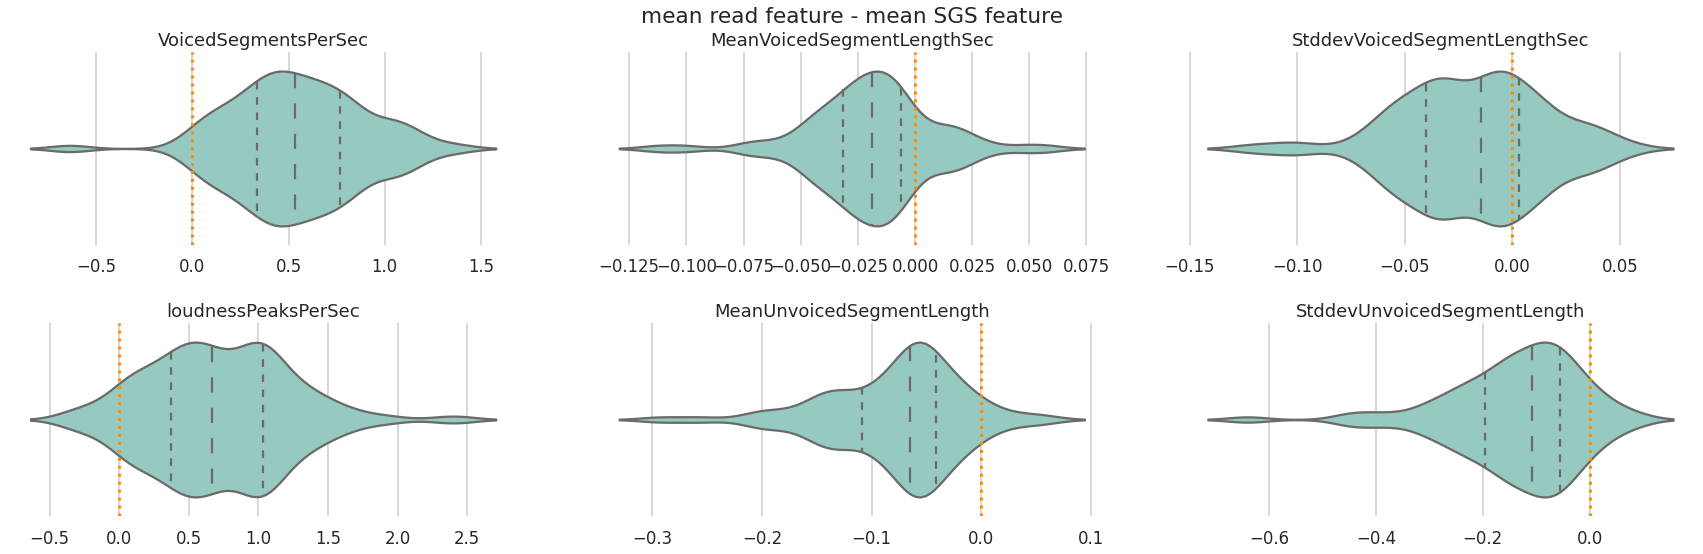

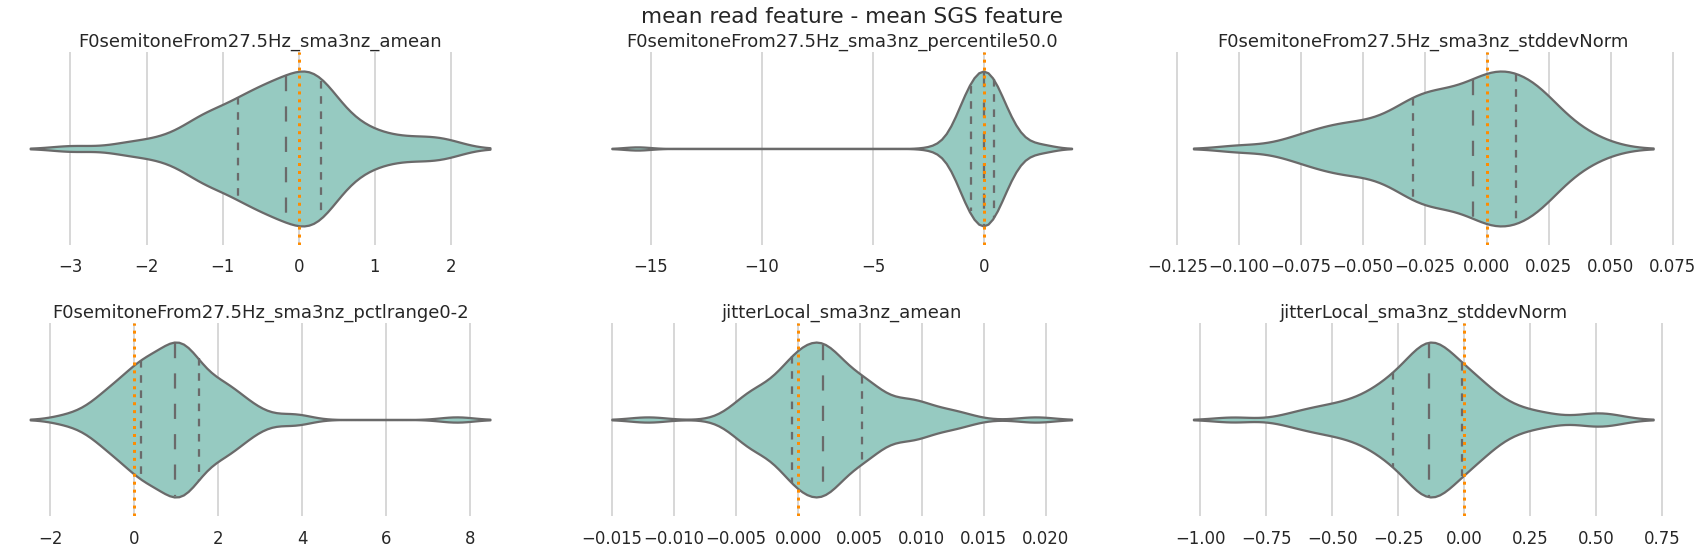

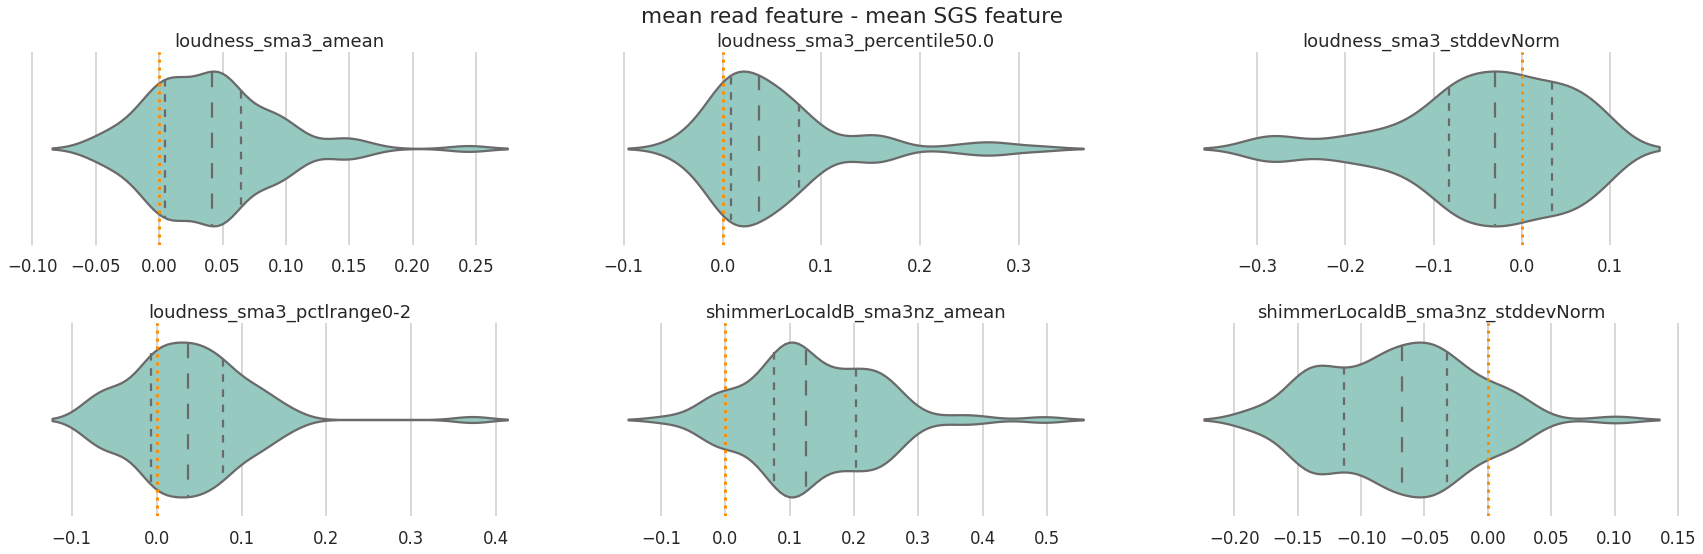

In [62]:
catplot_speech_style_wrapped(temporal_feat_cols)
catplot_speech_style_wrapped(freq_feat_cols)
catplot_speech_style_wrapped(ampl_feat_cols)
plt.show()

### `database` delta's **! beautiful figure**

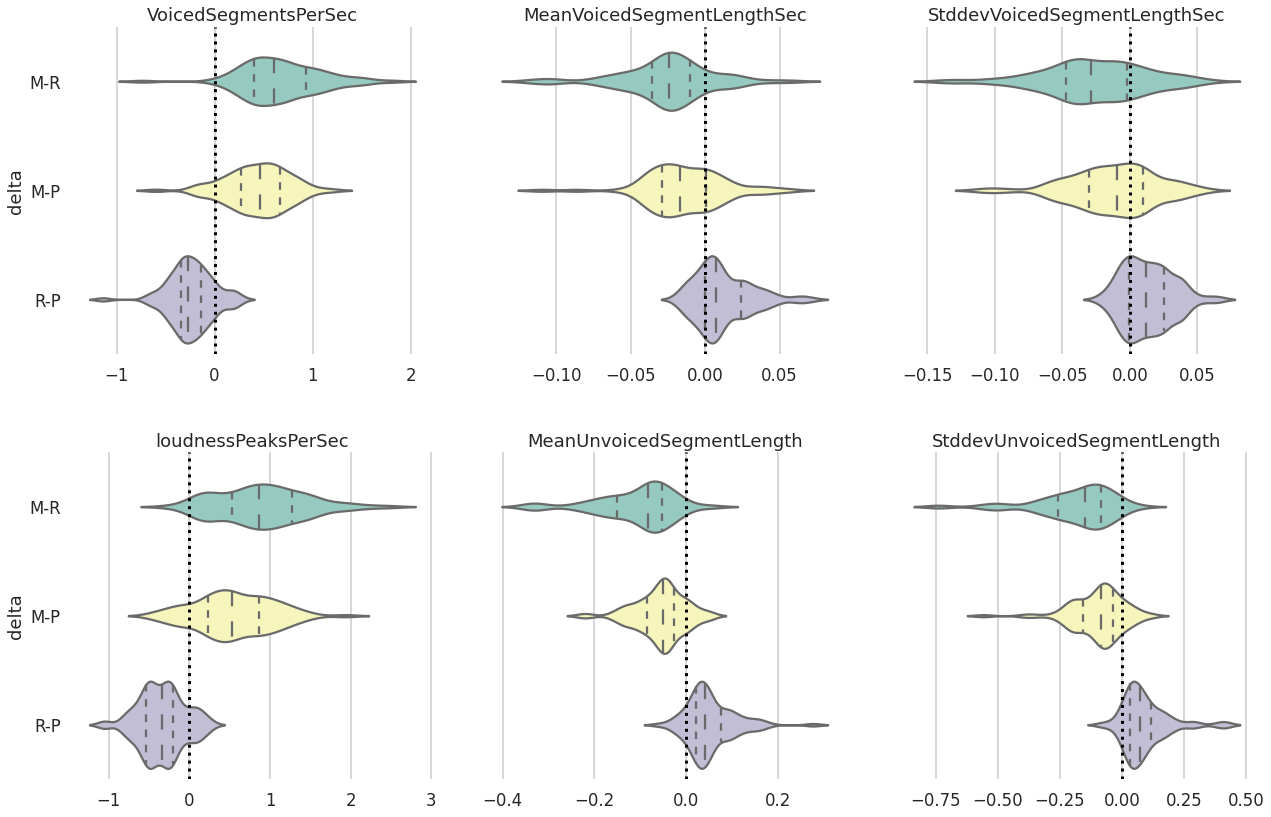

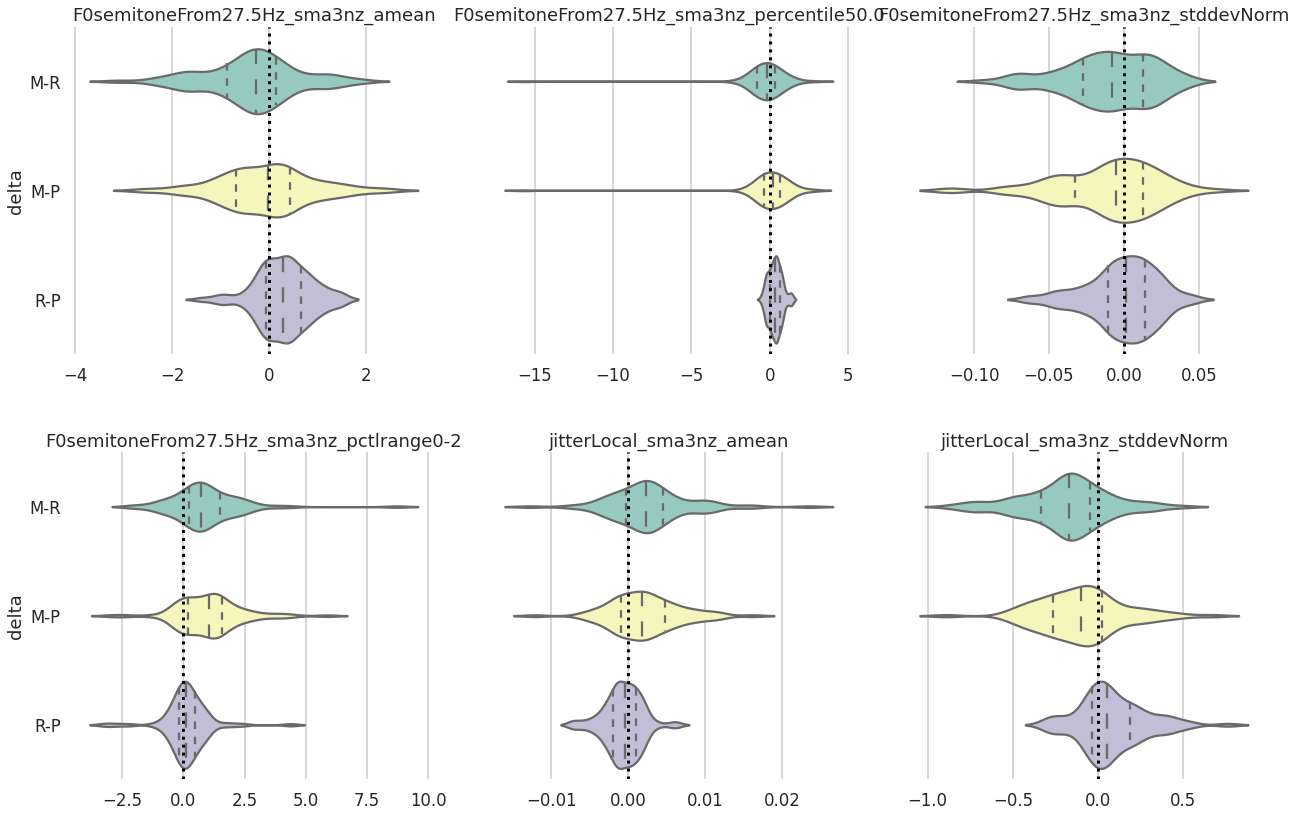

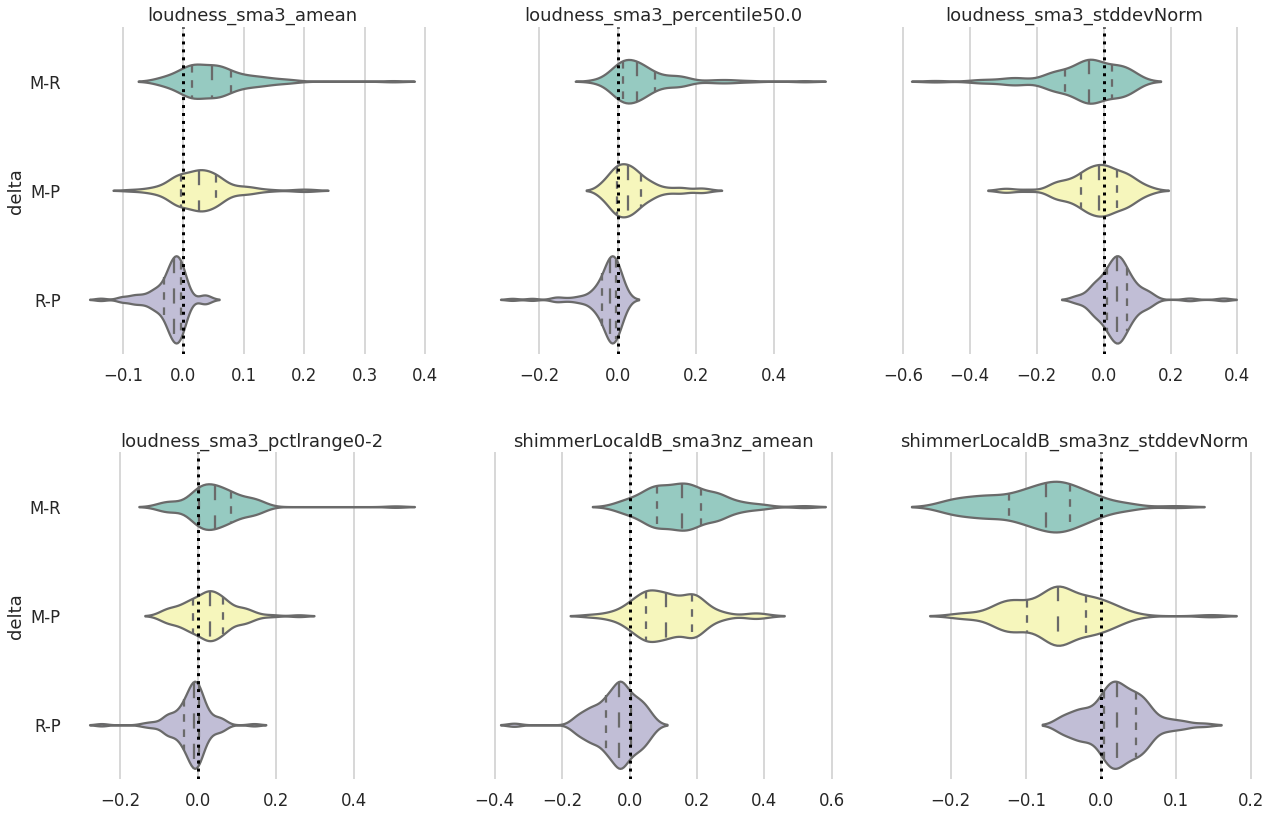

In [63]:
g = delta_catplot_wrapped(mean_db_func, temporal_feat_cols, kind="violin")
g.savefig("../reports/gemapsv10b_temporal_delta_features_db.png", bbox_inches="tight", dpi=250)
g.savefig("../reports/gemapsv10b_temporal_delta_features_db.pdf", bbox_inches="tight", dpi=250)
delta_catplot_wrapped(mean_db_func, freq_feat_cols, kind="violin")
g.savefig("../reports/gemapsv10b_frequency_delta_features_db.png", bbox_inches="tight", dpi=250)
g.savefig("../reports/gemapsv10b_frequency_delta_features_db.pdf", bbox_inches="tight", dpi=250)
delta_catplot_wrapped(mean_db_func, ampl_feat_cols, kind="violin")
g.savefig("../reports/gemapsv10b_amplitude_delta_features_db.png", bbox_inches="tight", dpi=250)
g.savefig("../reports/gemapsv10b_amplitude_delta_features_db.pdf", bbox_inches="tight", dpi=250)